# Import Libraries

In [104]:
from matplotlib.pyplot import figure as fig
from scipy.stats import linregress
# Essentials:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# t-SNE visualization
from sklearn.manifold import TSNE

# imputation
from sklearn.impute import KNNImputer

# Scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# K-means for Clustering
from sklearn.cluster import KMeans

# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer


# Read tha data

In [105]:
data= pd.read_csv('bankmarketing.csv')

In [106]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [108]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# EDA

In [109]:
data = data.drop(['y'], axis=1)

In [110]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [111]:
bank_cust = data[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [112]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [113]:
bank_cust.shape

(41188, 11)

In [114]:
bank_cust.describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [115]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [116]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [117]:
#data['age_bin'].value_counts()

In [118]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()

#data = bank_cust.apply(le.fit_transform)
#data.head()

In [119]:
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [120]:
#Exploratory Data Analysis
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})


In [121]:
#Univariated data analysis
data.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
dtype: int64

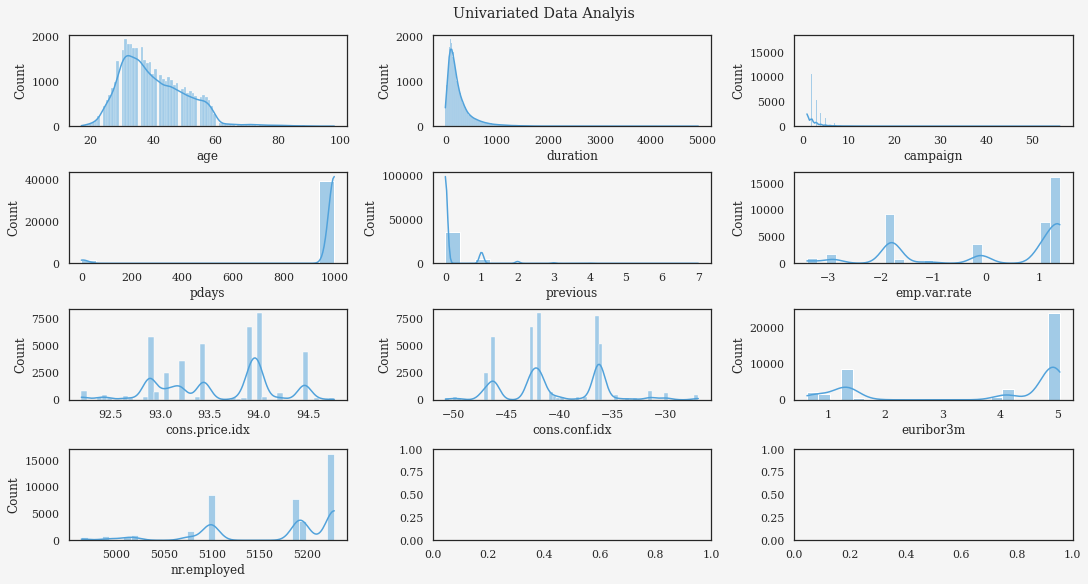

In [122]:
fig, ax = plt.subplots(nrows=4,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(data[i], ax=ax[x], kde=True, color=colors[2])
    

In [123]:
#Model Building
# First we will keep a copy of data
data_copy = data.copy()

# scaled_data

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler= StandardScaler()
dt = data.select_dtypes(include=np.number)
dt

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [126]:
scaled_data= scaler.fit_transform(dt)

In [127]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


# Models

# K_means

In [128]:
#How to choose k
##Elbow method
#Sum of squares of distances of points from corresponding cluster centroid (inertia) should be small


In [129]:
from  sklearn.cluster import KMeans

In [130]:
import matplotlib.pyplot as plt


In [131]:
import seaborn as sns

In [132]:
%matplotlib inline


In [133]:
sse ={}
for k in range(1,8):
        km = KMeans(n_clusters =k)
        print(k)
        km.fit(dt)
        km.inertia_
#print(sse)

1
2
3
4
5
6
7


In [134]:
"kmeans" == "Kmeans"

False

<AxesSubplot:title={'center':'The Elbe Method'}, xlabel='k', ylabel='SSE'>

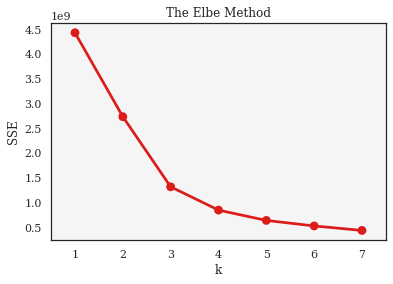

In [135]:
sse ={}
for k in range(1,8):
        Kmeans = KMeans(n_clusters =k, random_state=55)
        Kmeans.fit(dt)
        sse[k] = Kmeans.inertia_
        
plt.title("The Elbe Method") 
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))

In [136]:
# best number of clustteres is 3

In [137]:
model= KMeans(n_clusters=4, random_state=32)

In [138]:
model.fit(scaled_data)

KMeans(n_clusters=4, random_state=32)

In [139]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [140]:
new_df= pd.DataFrame(dt)
new_df                    

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [141]:
data["labels"]= model.labels_
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,labels
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [142]:
data.groupby("labels").agg({"mean", "count"}) 

age            duration             campaign             pdays  \
        count       mean    count        mean    count       mean  count   
labels                                                                     
0       26093  40.173648    26093  256.910397    26093   2.203426  26093   
1       11991  39.387040    11991  263.751981    11991   2.110249  11991   
2        1540  41.910390     1540  322.326623     1540   1.829870   1540   
3        1564  40.554987     1564  176.244885     1564  12.875959   1564   

                   previous           emp.var.rate           cons.price.idx  \
              mean    count      mean        count      mean          count   
labels                                                                        
0       999.000000    26093  0.026635        26093  1.106163          26093   
1       999.000000    11991  0.318072        11991 -2.025736          11991   
2        22.134416     1540  1.694805         1540 -2.088442           1540   
3       999.000000     1564  0.003197         1564  1.289258           1564   

                  cons.conf.idx            euribor3m           nr.employed  \
             mean         count       mean     count      mean       count   
labels                                                                       
0       93.837145         26093 -39.431499     26093  4.812556       26093   
1       92.986533         11991 -43.186698     11991  1.202250       11991   
2       93.352634          1540 -38.334935      1540  0.983318        1540   
3       93.949658          1564 -39.928069      1564  4.890800        1564   

                     
               mean  
labels               
0       5213.004492  
1       5077.964849  
2       5028.540909  
3       5219.385806

In [ ]:
#km=KMeans(n_clusters = 4, random_state=42)
#labels= km.fit_predict()
#data["cluster"]=labels

In [ ]:
#data["cluster"].value_counts()

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
#ig = plt.figure(figsize = (20,10))
#ax = fig.add_subplot(111, projection = "3d")
#ax.scatter(data["age"][data.labels == 0], data["loan"][data.labels == 0], c = "blue", s =60)
#ax.scatter(data["age"][data.labels == 1], data["loan"][data.labels == 1], c = "red", s =60)


#ax.view_init(30,185)
#plt.xlabel("job")
#plt.ylabel("marital")
#plt.show()

In [ ]:
#centers =pd.DataFrame (km.cluster_centers_,columns= data.columns)

In [ ]:
#centers.to_clipboard()

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
ss = StandardScaler()

In [ ]:
data = ss.fit_transform(new_df)

In [ ]:
data

In [ ]:
from kmodes.kmodes import KModes
#Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

In [ ]:
# Predicted Clusters
fitClusters_cao

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

In [ ]:
fitClusters_huang

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
## Choosing K=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

In [ ]:
fitClusters_cao

In [144]:
data = data_copy.reset_index()

In [145]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [146]:
combinedDf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster_predicted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [147]:
combinedDf.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [148]:
#Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15833 entries, 7763 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                15833 non-null  int64  
 1   job                15833 non-null  object 
 2   marital            15833 non-null  object 
 3   education          15833 non-null  object 
 4   default            15833 non-null  object 
 5   housing            15833 non-null  object 
 6   loan               15833 non-null  object 
 7   contact            15833 non-null  object 
 8   month              15833 non-null  object 
 9   day_of_week        15833 non-null  object 
 10  duration           15833 non-null  int64  
 11  campaign           15833 non-null  int64  
 12  pdays              15833 non-null  int64  
 13  previous           15833 non-null  int64  
 14  poutcome           15833 non-null  object 
 15  emp.var.rate       15833 non-null  float64
 16  cons.price.idx     

In [149]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10033 entries, 0 to 41185
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10033 non-null  int64  
 1   job                10033 non-null  object 
 2   marital            10033 non-null  object 
 3   education          10033 non-null  object 
 4   default            10033 non-null  object 
 5   housing            10033 non-null  object 
 6   loan               10033 non-null  object 
 7   contact            10033 non-null  object 
 8   month              10033 non-null  object 
 9   day_of_week        10033 non-null  object 
 10  duration           10033 non-null  int64  
 11  campaign           10033 non-null  int64  
 12  pdays              10033 non-null  int64  
 13  previous           10033 non-null  int64  
 14  poutcome           10033 non-null  object 
 15  emp.var.rate       10033 non-null  float64
 16  cons.price.idx     100

In [150]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 24016 to 41171
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9232 non-null   int64  
 1   job                9232 non-null   object 
 2   marital            9232 non-null   object 
 3   education          9232 non-null   object 
 4   default            9232 non-null   object 
 5   housing            9232 non-null   object 
 6   loan               9232 non-null   object 
 7   contact            9232 non-null   object 
 8   month              9232 non-null   object 
 9   day_of_week        9232 non-null   object 
 10  duration           9232 non-null   int64  
 11  campaign           9232 non-null   int64  
 12  pdays              9232 non-null   int64  
 13  previous           9232 non-null   int64  
 14  poutcome           9232 non-null   object 
 15  emp.var.rate       9232 non-null   float64
 16  cons.price.idx     

In [151]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090 entries, 7765 to 39769
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6090 non-null   int64  
 1   job                6090 non-null   object 
 2   marital            6090 non-null   object 
 3   education          6090 non-null   object 
 4   default            6090 non-null   object 
 5   housing            6090 non-null   object 
 6   loan               6090 non-null   object 
 7   contact            6090 non-null   object 
 8   month              6090 non-null   object 
 9   day_of_week        6090 non-null   object 
 10  duration           6090 non-null   int64  
 11  campaign           6090 non-null   int64  
 12  pdays              6090 non-null   int64  
 13  previous           6090 non-null   int64  
 14  poutcome           6090 non-null   object 
 15  emp.var.rate       6090 non-null   float64
 16  cons.price.idx     6

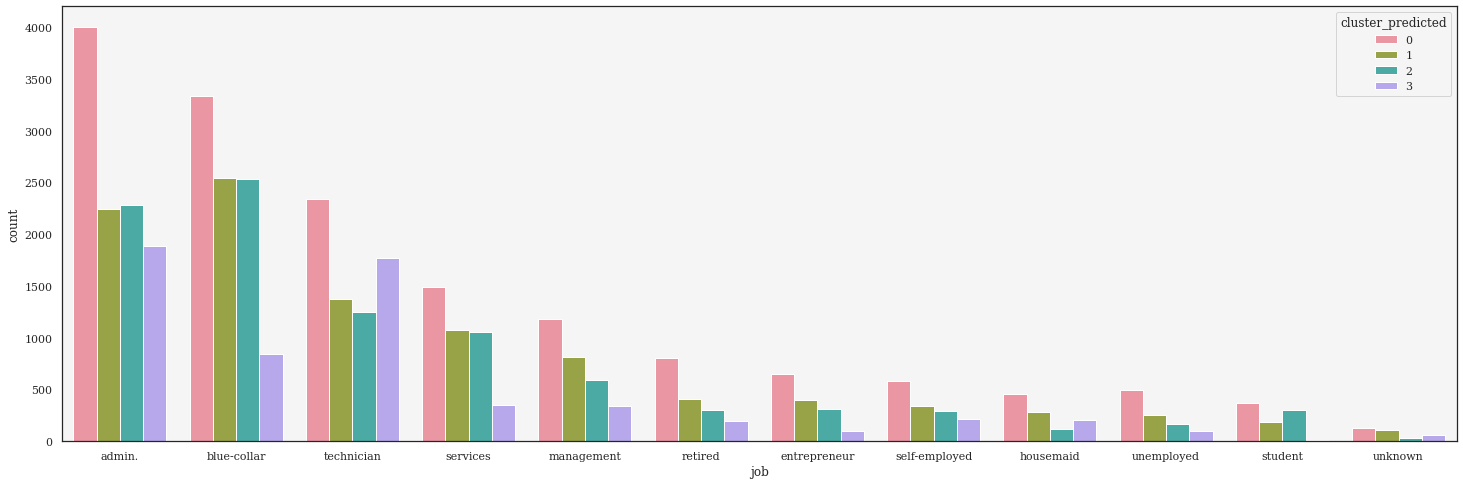

In [155]:
#job
plt.subplots(figsize = (25,8))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

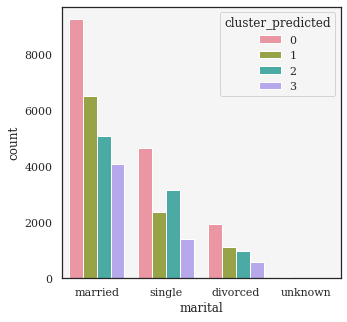

In [98]:
# Marital
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

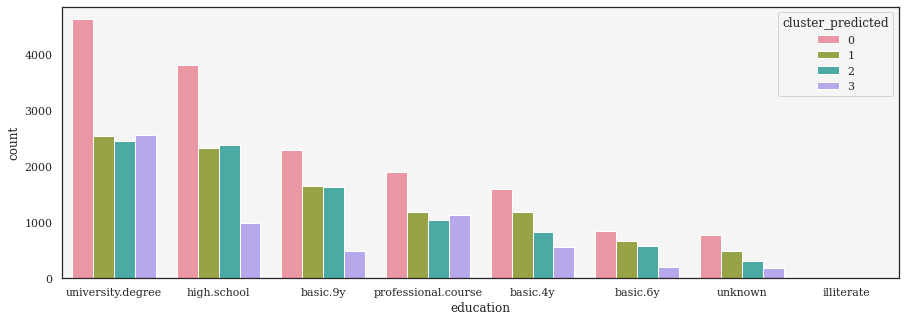

In [84]:
# Education
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

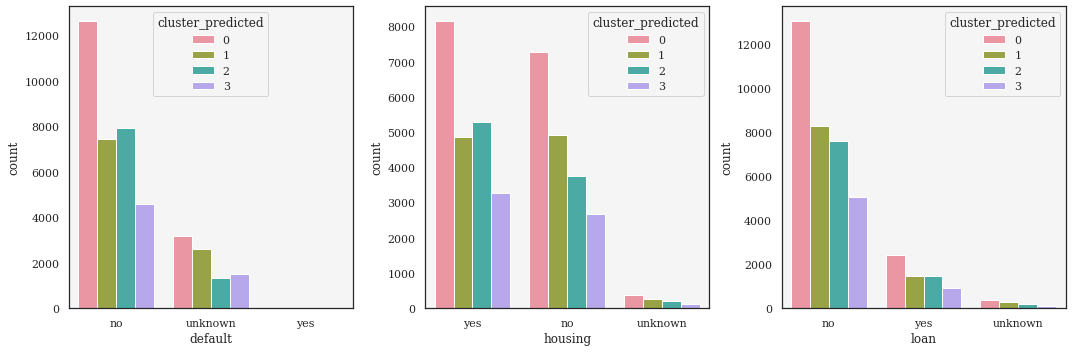

In [85]:
# Default
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

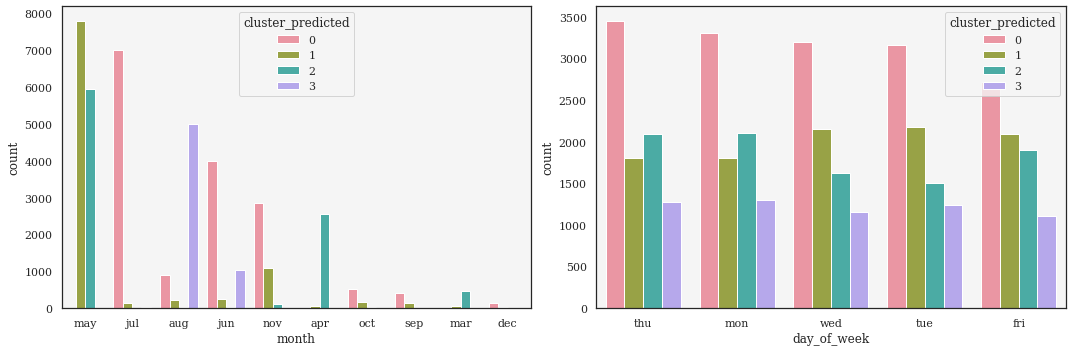

In [86]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data

In [ ]:
breast_data.shape

# affinity propagation clustering


In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
new_df = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Hiererarchy

In [ ]:
import os # new
from pathlib import Path

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend =shc.dendrogram(shc.linkage(new_df,method='ward'))